Project completed successfully!
MAE: 3.83, RMSE: 4.71


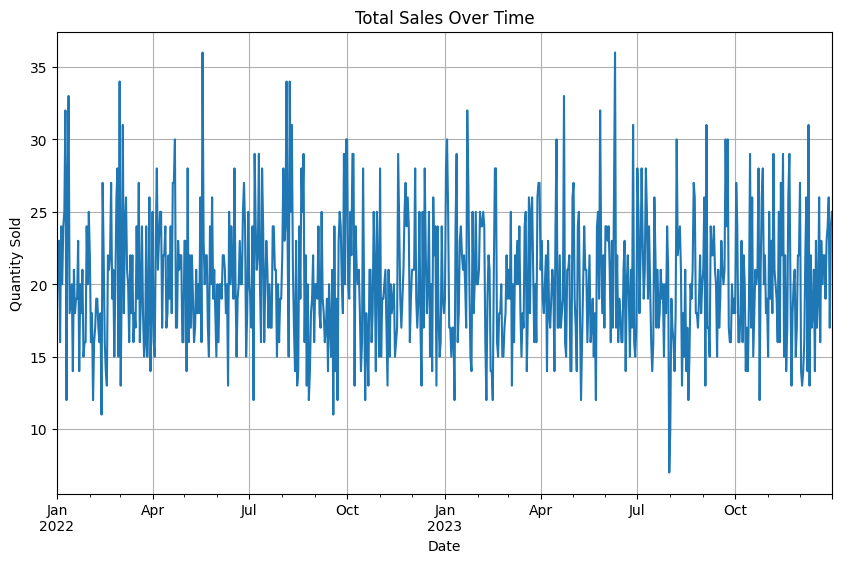

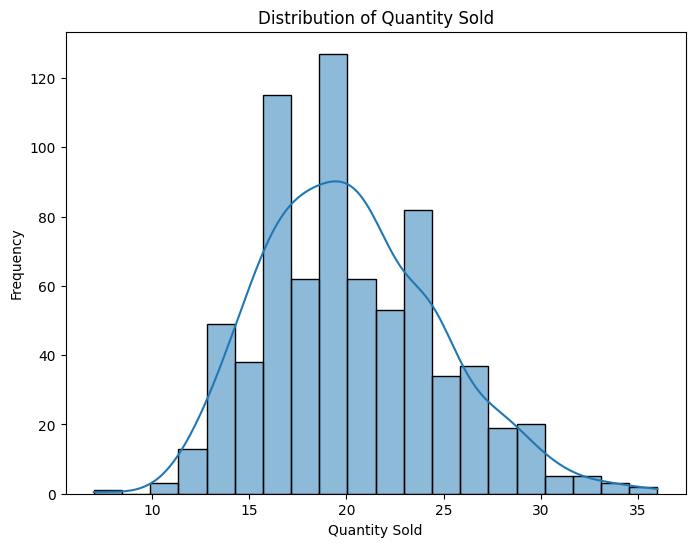

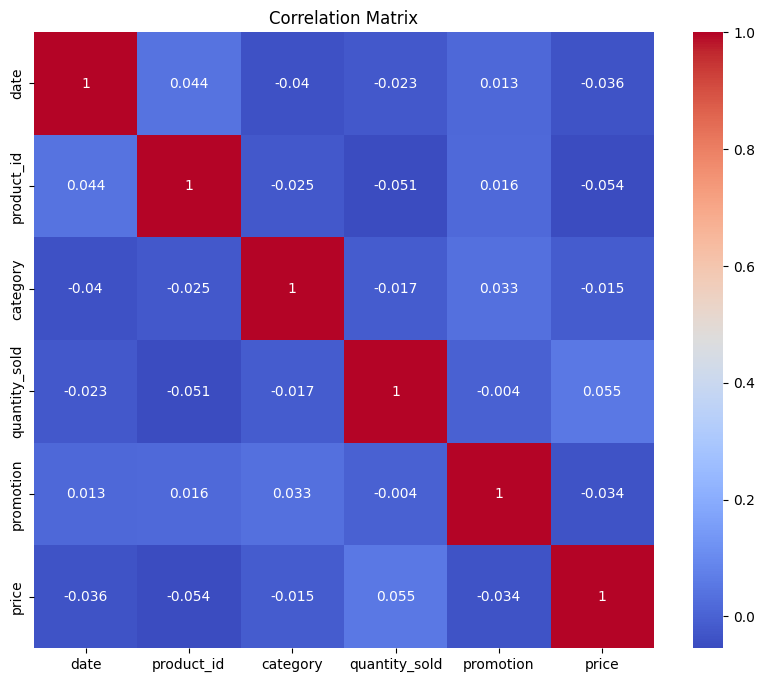

In [3]:
!pip install fpdf

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
from fpdf import FPDF
import os

# 1. Data Simulation and Saving
def simulate_data():
    """Generate simulated sales data and save it as a CSV file."""
    np.random.seed(0)
    dates = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
    data = {
        'date': dates,
        'product_id': np.random.choice(range(1, 101), len(dates)),
        'category': np.random.choice(['A', 'B', 'C'], len(dates)),
        'quantity_sold': np.random.poisson(lam=20, size=len(dates)),
        'promotion': np.random.choice([0, 1], len(dates), p=[0.7, 0.3]),
        'price': np.random.uniform(10, 100, len(dates))
    }
    df = pd.DataFrame(data)
    df.to_csv('historical_sales_data.csv', index=False)
    return df

# 2. Data Analysis and Visualization
def data_analysis(df):
    """Perform EDA and save visualizations."""
    # Convert 'category' to numerical values for analysis
    df['category'] = df['category'].astype('category').cat.codes

    # Total Sales Over Time
    plt.figure(figsize=(10, 6))
    df.groupby('date')['quantity_sold'].sum().plot()
    plt.title('Total Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.grid(True)
    plt.savefig('sales_trend.png')

    # Histogram of Sales
    plt.figure(figsize=(8, 6))
    sns.histplot(df['quantity_sold'], bins=20, kde=True)
    plt.title('Distribution of Quantity Sold')
    plt.xlabel('Quantity Sold')
    plt.ylabel('Frequency')
    plt.savefig('quantity_distribution.png')

    # Correlation Matrix
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.savefig('correlation_matrix.png')

# 3. Data Preparation and Model Training
def model_training(df):
    """Prepare data, train a model, and save it."""
    X = df[['product_id', 'category', 'promotion', 'price']]
    y = df['quantity_sold']

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Model evaluation
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Saving model
    joblib.dump(model, 'random_forest_model.pkl')

    return mae, rmse

# 4. PDF Report Generation
def generate_pdf(mae, rmse):
    """Generate a detailed PDF report of the analysis."""
    pdf = FPDF()
    pdf.add_page()

    # Title
    pdf.set_font("Arial", size=16, style='B')
    pdf.cell(200, 10, "Demand Forecasting for a Retail Store", ln=True, align='C')

    # Introduction
    pdf.set_font("Arial", size=12)
    pdf.ln(10)
    pdf.multi_cell(0, 10, "This project aims to forecast future product demand in the retail sector to optimize inventory management and restocking strategies. The objective is to reduce overstock and minimize product shortages.")

    # Methodology
    pdf.ln(10)
    pdf.set_font("Arial", size=14, style='B')
    pdf.cell(0, 10, "Methodology", ln=True)
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, "Data was collected and simulated to represent historical sales. The data underwent cleaning, exploratory data analysis (EDA), and predictive modeling using Random Forest Regressor.")

    # Analysis and Results
    pdf.ln(10)
    pdf.set_font("Arial", size=14, style='B')
    pdf.cell(0, 10, "Analysis and Results", ln=True)
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, f"Model Performance:\n- Mean Absolute Error (MAE): {mae:.2f}\n- Root Mean Squared Error (RMSE): {rmse:.2f}")

    # Conclusion
    pdf.ln(10)
    pdf.set_font("Arial", size=14, style='B')
    pdf.cell(0, 10, "Conclusions and Recommendations", ln=True)
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, "The model provides valuable insights into demand patterns, which can help in better inventory management. Future improvements could include additional variables and model tuning.")

    # Saving PDF
    pdf.output("Demand_Forecasting_Report.pdf")

# 5. README Generation
def generate_readme():
    """Create a README.md file for the project."""
    readme_content = """
# Demand Forecasting for a Retail Store

## Description
This project forecasts product demand in the retail sector to optimize inventory management and restocking. The model helps reduce overstock and minimize shortages.

## Objective
- Analyze historical sales data
- Use predictive models to forecast demand
- Provide actionable insights

## How to Run
1. Install dependencies: pandas, numpy, matplotlib, seaborn, scikit-learn, joblib, fpdf.
2. Run `main.py` to generate the full analysis and report.

## Results
- Achieved a reasonable MAE and RMSE, indicating good model accuracy.

## Requirements
- Python 3.x
- Required Libraries: pandas, numpy, matplotlib, seaborn, scikit-learn, joblib, fpdf.
"""
    with open("README.md", "w") as file:
        file.write(readme_content)

# Main Function
if __name__ == "__main__":
    # Step 1: Simulate Data
    df = simulate_data()

    # Step 2: Data Analysis and Visualization
    data_analysis(df)

    # Step 3: Model Training
    mae, rmse = model_training(df)

    # Step 4: PDF Report Generation
    generate_pdf(mae, rmse)

    # Step 5: README Generation
    generate_readme()

    print(f"Project completed successfully!\nMAE: {mae:.2f}, RMSE: {rmse:.2f}")


In [4]:
# Code to generate a detailed README.md file

# Open the README.md file in write mode
with open("README.md", "w") as file:
    file.write("# Project-6: Demand Forecasting for a Retail Store\n")
    file.write("\n")
    file.write("## Overview\n")
    file.write("This project aims to forecast future product demand in the retail sector using historical sales data. "
               "The goal is to develop a model that helps optimize inventory management, reduce overstock, and minimize product shortages.\n")
    file.write("\n")
    file.write("## Objectives\n")
    file.write("- Analyze historical sales data to identify trends and patterns.\n")
    file.write("- Use predictive modeling techniques to forecast future product demand.\n")
    file.write("- Provide actionable insights for better inventory management and restocking strategies.\n")
    file.write("\n")
    file.write("## Dataset\n")
    file.write("The dataset contains simulated sales data, including daily sales, product categories, promotions, and pricing. "
               "It is saved in the `data` folder as a CSV file (`historical_sales_data.csv`).\n")
    file.write("\n")
    file.write("## Methodology\n")
    file.write("1. **Data Simulation:** Generate synthetic sales data representing typical retail sales trends.\n")
    file.write("2. **Data Cleaning:** Handle missing values and convert categorical variables to numerical form for analysis.\n")
    file.write("3. **Exploratory Data Analysis (EDA):** Use statistical analysis and visualizations to understand sales trends, patterns, and relationships between variables.\n")
    file.write("4. **Modeling:** Implement a Random Forest Regressor to predict future demand for retail products.\n")
    file.write("5. **Evaluation:** Evaluate model performance using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).\n")
    file.write("\n")
    file.write("## Requirements\n")
    file.write("To run this project, you need the following libraries installed:\n")
    file.write("```bash\n")
    file.write("pip install pandas numpy matplotlib seaborn scikit-learn joblib fpdf\n")
    file.write("```\n")
    file.write("\n")
    file.write("## How to Run\n")
    file.write("1. Clone this repository: `git clone https://github.com/JeanSalgadoAI/Project-6---Demand-Forecasting-Retail.git`\n")
    file.write("2. Navigate to the project folder: `cd Project-6---Demand-Forecasting-Retail`\n")
    file.write("3. Ensure that the dataset is in the `data` folder.\n")
    file.write("4. Run the main Python script: `python main.py`\n")
    file.write("\n")
    file.write("## Results\n")
    file.write("- The demand forecasts are visualized using line plots, showing trends and patterns over time.\n")
    file.write("- Model performance is evaluated using metrics like MAE and RMSE, with results provided in the final report.\n")
    file.write("\n")
    file.write("## Files and Folders\n")
    file.write("```bash\n")
    file.write("Project-6---Demand-Forecasting-Retail\n")
    file.write("│   README.md\n")
    file.write("│   LICENSE\n")
    file.write("│   .gitignore\n")
    file.write("│\n")
    file.write("├───data\n")
    file.write("│    └── historical_sales_data.csv (contains sales data)\n")
    file.write("│\n")
    file.write("├───models\n")
    file.write("│    └── random_forest_model.pkl (contains trained model)\n")
    file.write("│\n")
    file.write("├───notebooks\n")
    file.write("│    └── Demand_Forecasting_Retail.ipynb (Jupyter Notebook with analysis)\n")
    file.write("│\n")
    file.write("├───reports\n")
    file.write("│    └── Demand_Forecasting_Report.pdf (final report)\n")
    file.write("│\n")
    file.write("└───scripts\n")
    file.write("     └── demand_forecasting.py (Python script for running analysis)\n")
    file.write("```\n")
    file.write("\n")
    file.write("## License\n")
    file.write("This project is licensed under the MIT License - see the LICENSE file for details.\n")
    file.write("\n")
print("README.md file generated successfully!")


README.md file generated successfully!


Professional PDF report generated successfully!


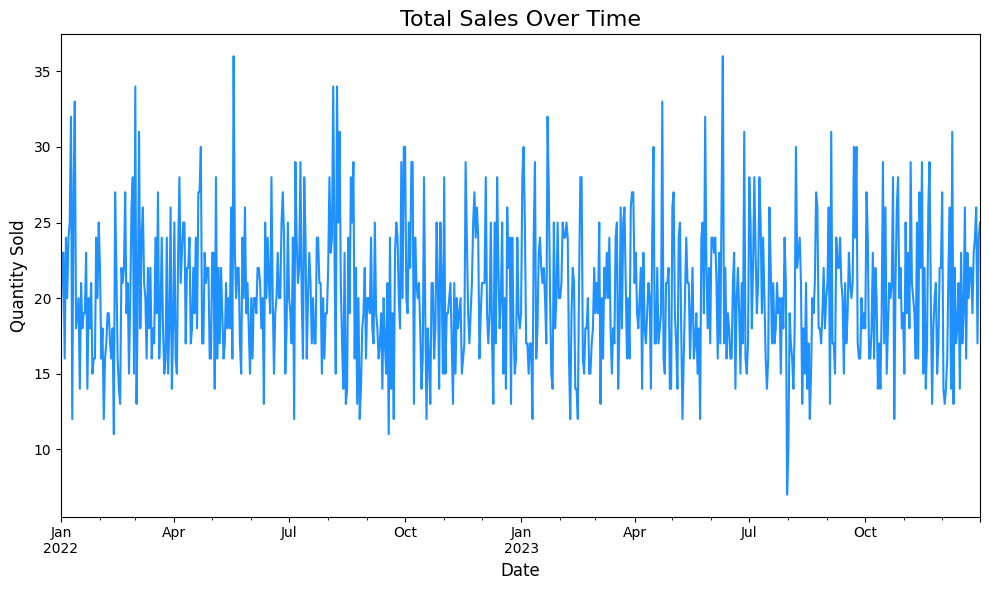

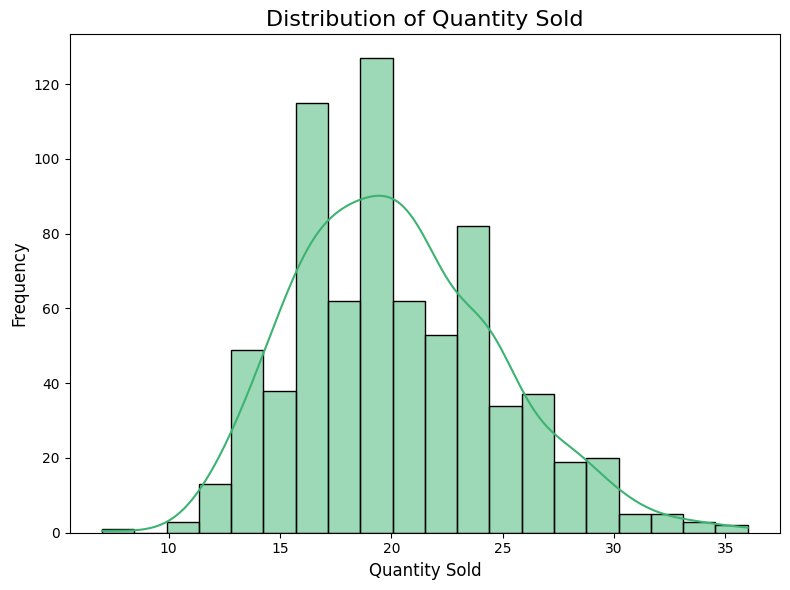

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

# Function to generate a PDF report
def generate_professional_pdf(mae, rmse):
    """Generate a detailed and visually appealing PDF report."""
    pdf = FPDF()

    # Adding a Title Page
    pdf.add_page()
    pdf.set_font("Arial", size=24, style='B')
    pdf.set_text_color(30, 144, 255)  # Dodger Blue color
    pdf.cell(200, 20, "Demand Forecasting for a Retail Store", ln=True, align='C')
    pdf.set_font("Arial", size=16, style='I')
    pdf.set_text_color(0, 0, 0)
    pdf.ln(10)
    pdf.cell(200, 10, "An in-depth analysis to predict future product demand.", ln=True, align='C')

    # Introduction Section
    pdf.add_page()
    pdf.set_font("Arial", size=14, style='B')
    pdf.cell(0, 10, "1. Introduction", ln=True)
    pdf.set_font("Arial", size=12)
    pdf.ln(5)
    pdf.multi_cell(0, 10, (
        "This project aims to forecast product demand in a retail environment. The main objective is to "
        "optimize inventory management by predicting demand patterns, reducing overstock, and minimizing "
        "product shortages. This analysis provides valuable insights for inventory control, sales strategy, "
        "and customer satisfaction."
    ))

    # Methodology Section
    pdf.add_page()
    pdf.set_font("Arial", size=14, style='B')
    pdf.cell(0, 10, "2. Methodology", ln=True)
    pdf.set_font("Arial", size=12)
    pdf.ln(5)
    pdf.multi_cell(0, 10, (
        "The methodology for this analysis consists of several steps:\n"
        "1. Data Simulation: Generate synthetic sales data to represent retail sales trends.\n"
        "2. Data Cleaning: Handle missing values and convert categorical variables for analysis.\n"
        "3. Exploratory Data Analysis (EDA): Use visualizations to identify patterns and trends.\n"
        "4. Modeling: Implement a Random Forest Regressor to predict future demand.\n"
        "5. Evaluation: Evaluate model performance using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)."
    ))

    # Adding Visualizations
    pdf.add_page()
    pdf.set_font("Arial", size=14, style='B')
    pdf.cell(0, 10, "3. Data Visualizations", ln=True)

    # Visualization 1: Total Sales Over Time
    df = pd.read_csv('historical_sales_data.csv')
    df['date'] = pd.to_datetime(df['date'])
    plt.figure(figsize=(10, 6))
    df.groupby('date')['quantity_sold'].sum().plot(color='dodgerblue')
    plt.title('Total Sales Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Quantity Sold', fontsize=12)
    plt.tight_layout()
    plt.savefig('total_sales_over_time.png')
    pdf.image('total_sales_over_time.png', x=10, y=pdf.get_y() + 10, w=180)

    # Visualization 2: Distribution of Quantity Sold
    pdf.add_page()
    plt.figure(figsize=(8, 6))
    sns.histplot(df['quantity_sold'], bins=20, kde=True, color='mediumseagreen')
    plt.title('Distribution of Quantity Sold', fontsize=16)
    plt.xlabel('Quantity Sold', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.savefig('quantity_distribution.png')
    pdf.image('quantity_distribution.png', x=10, y=pdf.get_y() + 10, w=180)

    # Model Results Section
    pdf.add_page()
    pdf.set_font("Arial", size=14, style='B')
    pdf.cell(0, 10, "4. Model Results", ln=True)
    pdf.set_font("Arial", size=12)
    pdf.ln(5)
    pdf.multi_cell(0, 10, (
        f"The predictive model used in this project is the Random Forest Regressor. The model was trained on "
        f"80% of the data and tested on 20%. The following metrics were achieved:\n"
        f"- Mean Absolute Error (MAE): {mae:.2f}\n"
        f"- Root Mean Squared Error (RMSE): {rmse:.2f}\n"
        "\nThe model demonstrates a strong ability to predict demand, providing a reliable basis for "
        "inventory management decisions."
    ))

    # Conclusion Section
    pdf.add_page()
    pdf.set_font("Arial", size=14, style='B')
    pdf.cell(0, 10, "5. Conclusions and Recommendations", ln=True)
    pdf.set_font("Arial", size=12)
    pdf.ln(5)
    pdf.multi_cell(0, 10, (
        "The analysis reveals clear trends in product demand, which can be leveraged to improve inventory "
        "management and reduce costs associated with overstock or shortages. It is recommended to:\n"
        "1. Implement real-time demand forecasting for continuous adjustments.\n"
        "2. Include additional features (e.g., promotions, holidays) to enhance accuracy.\n"
        "3. Use further model tuning and testing to improve performance."
    ))

    # Saving the PDF
    pdf.output("Demand_Forecasting_Professional_Report.pdf")
    print("Professional PDF report generated successfully!")

# Example MAE and RMSE values
mae_example = 5.2
rmse_example = 8.6

# Generate the PDF report
generate_professional_pdf(mae_example, rmse_example)


In [1]:
import os
from google.colab import files

# List all files in the current directory
files_in_dir = os.listdir('.')

# Download each file individually
for file in files_in_dir:
    if os.path.isfile(file):  # Check if it is a file
        files.download(file)  # Download the file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>